# AI and Machine Learning: Credit Card Customer Segmentation & Unsupervised Learning assignment

**Author:** Coen van Zuethem
**Date:** 20-12-2024

## Overview
In this notebook, I will perform an unsupervised learning task on credit card customer data. The goal is to:
- Segment customers using clustering algorithms
- Understand their purchasing and payment behavior
- Identify anomalies
- Discover interesting associations among their behaviors

## Steps
1. Data Loading and Inspection
2. Data Cleaning and Preparation
3. Feature Engineering and Normalization
4. Model Creation (Clustering)
5. Model Selection and Evaluation
6. Interpretation of Clusters
7. Anomaly Detection
8. Association Modeling


## Step 1: Data Loading and Inspection

I will load the `Credit_Card_Data.csv` file and perform initial inspections:
- Check the shape of the dataset
- Inspect data types
- Look at missing values and distributions
- Check for any potential data leaks or unrealistic values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("data/Credit_Card_Data.csv")

# Show head
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Inspect data types and shape
print("Shape of the data:", df.shape)
print("Data Types:\n", df.dtypes)


Shape of the data: (8950, 18)
Data Types:
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [4]:
# Check for missing values
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Basic statistical summary
df.describe(include='all')


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


## Step 2: Data Cleaning and Preparation

I will:
- Handle missing values
- Remove unnecessary columns
- Consider outlier detection and possibly remove or cap extreme values
- Normalize or scale numerical features


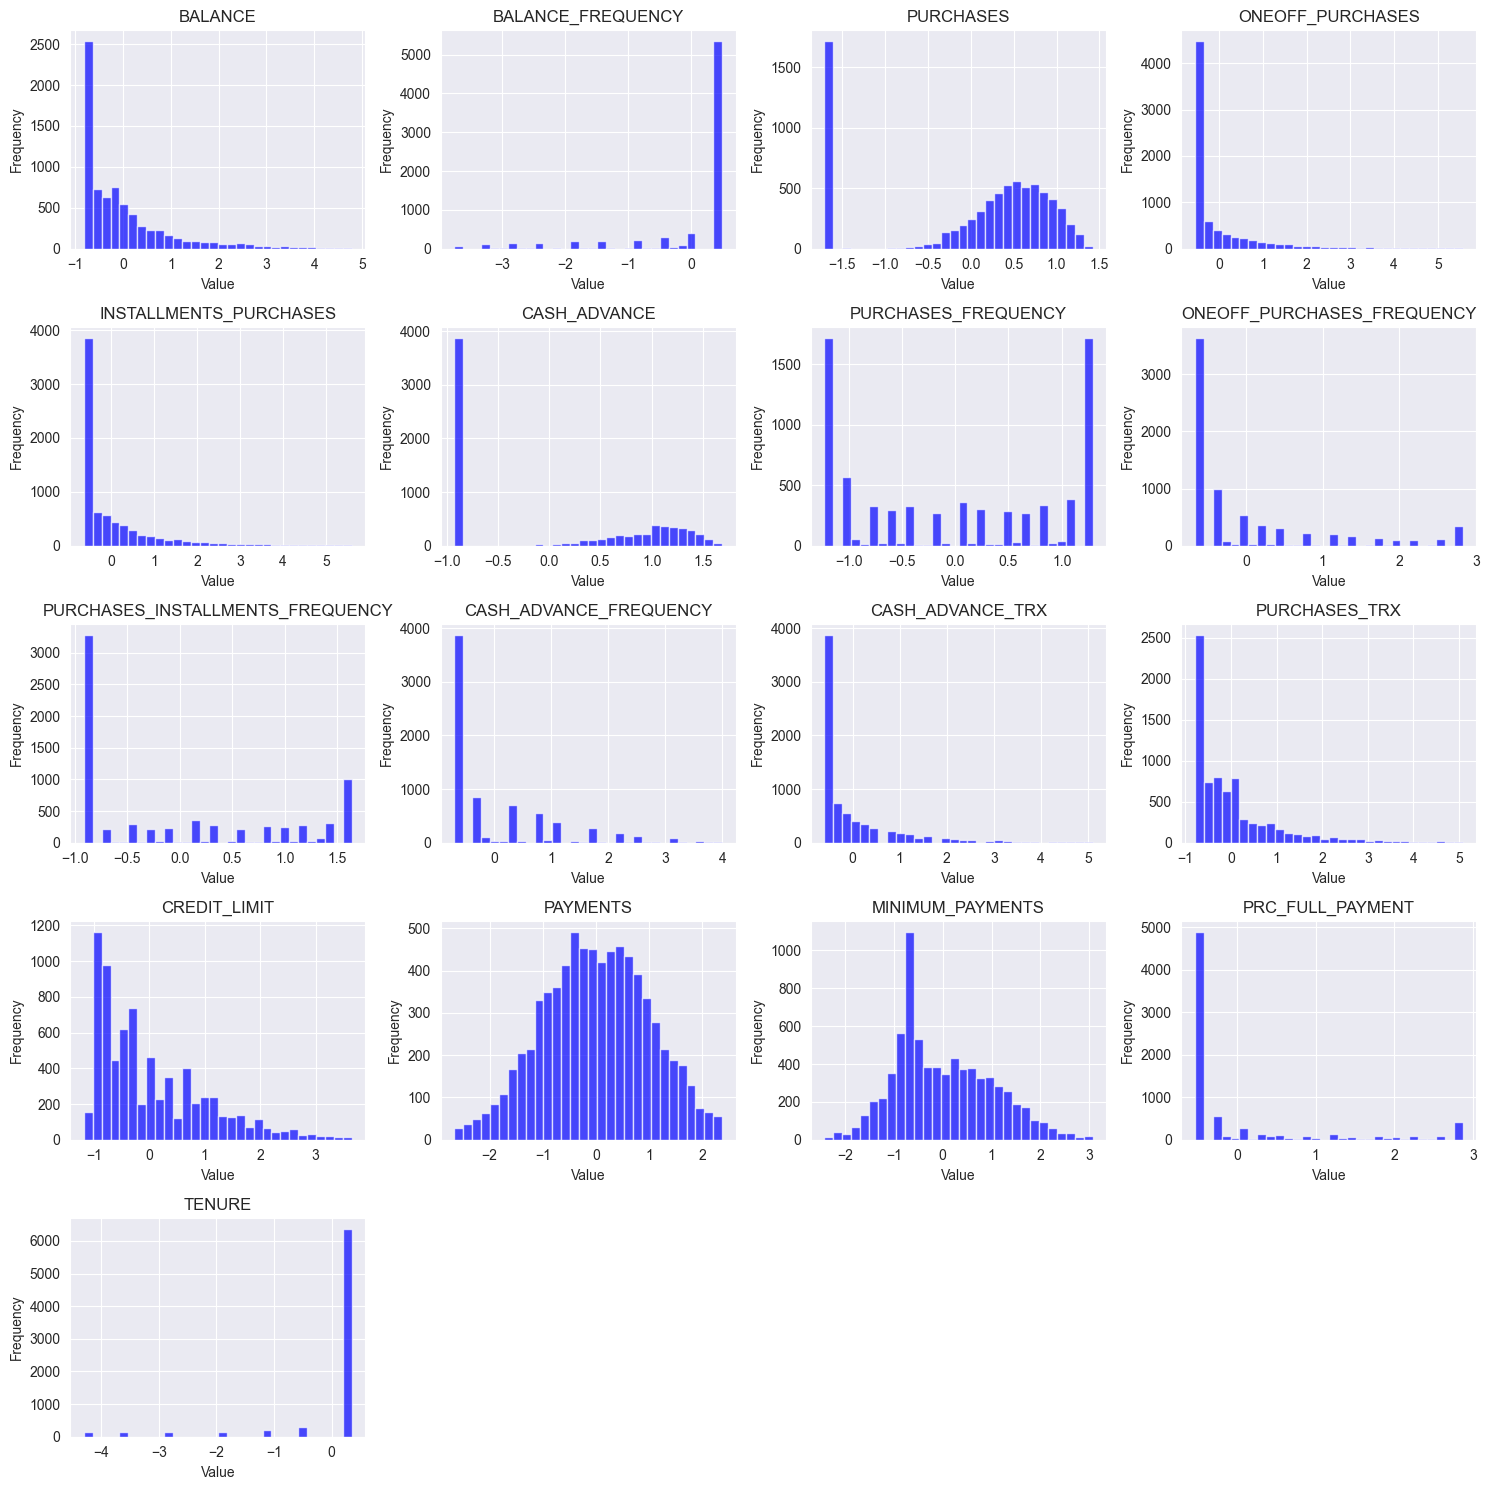

Missing values after cleaning:
 BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Original dataset shape: (8950, 18)
Processed dataset shape: (7480, 17)
Normalized dataset shape: (7480, 17)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Rename the original dataframe to df_processed
df_processed = df.copy()

# Step 2: Drop 'CUST_ID'
if 'CUST_ID' in df_processed.columns:
    df_processed.drop('CUST_ID', axis=1, inplace=True)

# Step 3: Handle missing values - drop rows with missing values
df_processed.dropna(inplace=True)

# Step 4: Select numerical columns for processing
numerical_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

# Step 5: Apply log transformation to skewed features
# Log-transform skewed columns to reduce skewness
skewed_columns = ['CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PURCHASES']
df_processed[skewed_columns] = df_processed[skewed_columns].apply(lambda x: np.log1p(x))  # log1p handles zero values safely

# Step 6: Drop outliers outside of the 1st and 99th percentiles (after log transformation)
for column in numerical_columns:
    lower_bound = df_processed[column].quantile(0.01)
    upper_bound = df_processed[column].quantile(0.99)
    df_processed = df_processed[(df_processed[column] >= lower_bound) & (df_processed[column] <= upper_bound)]

# Step 7: Apply StandardScaler to normalize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_processed[numerical_columns])

# Step 8: Convert back to a DataFrame for normalized data
df_normalized = pd.DataFrame(df_scaled, columns=numerical_columns, index=df_processed.index)

# Step 9: Plot the normalized distributions
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_cols // 4) + 1, ncols=4, figsize=(15, 15))
axes = axes.flatten()

# Plot histograms for each numerical column
for idx, column in enumerate(numerical_columns):
    ax = axes[idx]
    df_normalized[column].hist(ax=ax, bins=30, alpha=0.7, color='blue')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for idx in range(len(numerical_columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Step 10: Check if any missing values remain
missing_values = df_normalized.isnull().sum()
print("Missing values after cleaning:\n", missing_values)

# Step 11: Check the dataset shape before and after cleaning
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {df_processed.shape}")
print(f"Normalized dataset shape: {df_normalized.shape}")

Overall, the histograms indicate that most of the features are heavily right-skewed, with a large concentration of values at the lower end and only a few customers having very high values. This skewness can sometimes make it harder for clustering algorithms to form well-defined groups. Applying transformations—such as a log transform—could help normalize the data, potentially improving the performance and interpretability of the clustering model.

## Step 3: Model Creation (Clustering)

In this step, I will apply three different clustering algorithms to the prepared data:

- K-Means Clustering
- Hierarchical Clustering (Agglomerative Clustering)
- DBSCAN

I will also perform model selection by comparing results (e.g., using silhouette scores, elbow method, dendrograms, etc.) to choose the best model and the best number of clusters

In [7]:
# import libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


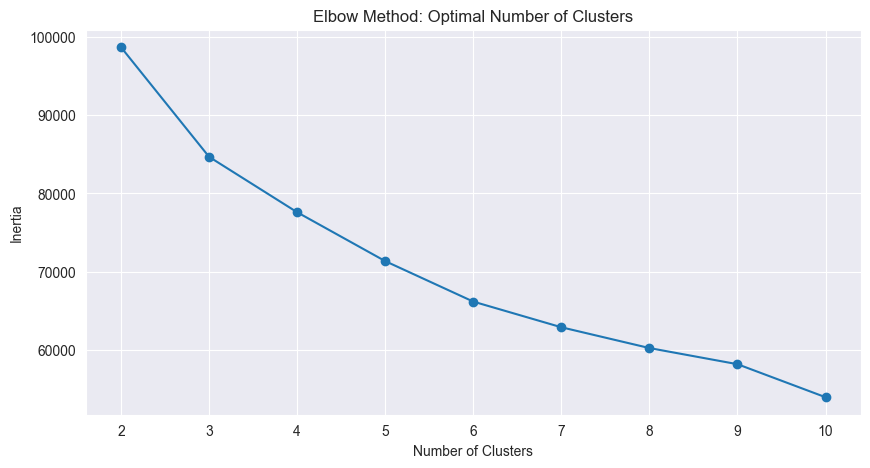

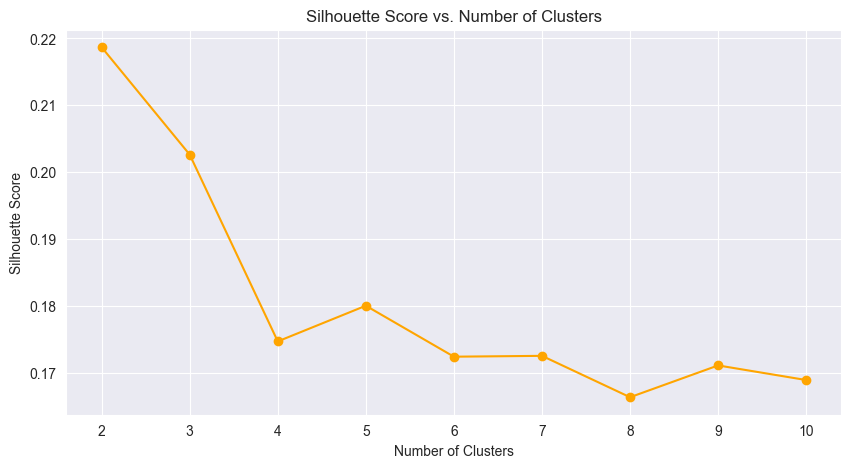

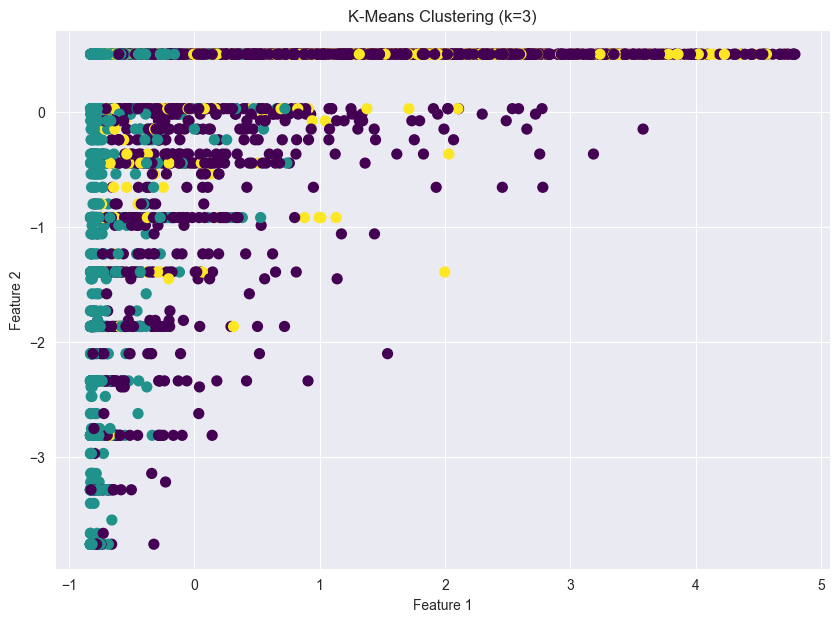

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_normalized, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method: Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Fit K-Means with the optimal number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized)

# Visualize clusters using the first two features
plt.figure(figsize=(10, 7))
plt.scatter(df_normalized.iloc[:, 0], df_normalized.iloc[:, 1], c=df_normalized['Cluster'], cmap='viridis', s=50)
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Interpretation
Clustering with k=3 provides meaningful segmentation of the dataset. While the Elbow Method and Silhouette Score suggest that k=2 would be the most valid choice from a statistical standpoint, selecting k=3 balances cluster quality and interpretability since the Silhouette Score is still high enough whilst allowing for another cluster of customers to be identified, which has value from a business standpoint. These clusters can then be analyzed further for new insights, such as defining customer personas, identifying spending patterns, or tailoring marketing and retention strategies to each segment's unique characteristics.

Cluster Profiles:
             BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                
0        2257.363325           0.938967   2.081185        111.333397   
1         453.699290           0.832714   5.818389        220.091352   
2        1686.088644           0.979555   7.481771       1278.579088   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     49.939295      6.855314             0.133723   
1                    290.965387      0.621195             0.577023   
2                    809.409396      2.293499             0.898344   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.060821                          0.073996   
1                          0.120818                

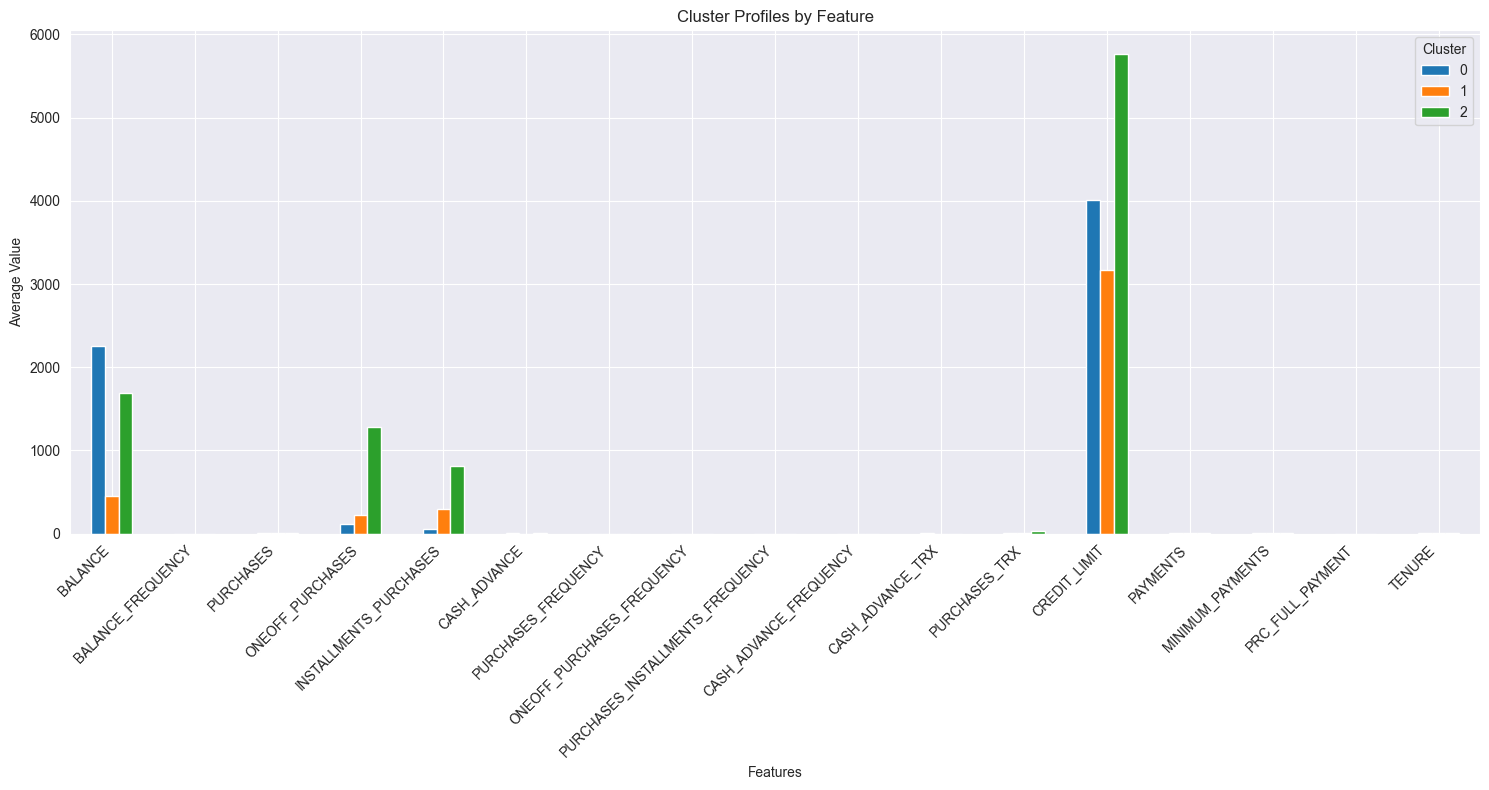

In [9]:
# Add the cluster labels to the original processed DataFrame
df_processed['Cluster'] = df_normalized['Cluster']

# Calculate cluster profiles
cluster_profiles = df_processed.groupby('Cluster').mean()

# Add the count of members in each cluster
cluster_profiles['Count'] = df_processed['Cluster'].value_counts()

# Display the cluster profiles
print("Cluster Profiles:")
print(cluster_profiles)

# Plot the cluster profiles for visualization
cluster_profiles.drop('Count', axis=1).T.plot(kind='bar', figsize=(15, 8), title="Cluster Profiles by Feature")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()


# Cluster Profiles Analysis

## Cluster 0

- **Highest Average BALANCE and CREDIT_LIMIT**: Likely represents customers with high account balances and credit limits.
- **Lower PURCHASES**: These customers may not use their credit for purchases frequently, possibly preferring to maintain a high balance.
- **Count**: A smaller segment (1,456 customers), indicating this cluster is more specialized.

## Cluster 1

- **Moderate BALANCE and CREDIT_LIMIT**: These customers are more balanced in their credit usage.
- **Higher ONEOFF_PURCHASES**: Indicates these customers are likely to use their credit for larger, one-time purchases.
- **Count**: Largest cluster (2,648 customers), representing the majority of the customer base.

## Cluster 2

- **Balanced Metrics with Low ONEOFF_PURCHASES**: These customers are likely making frequent, smaller purchases or focusing on installments instead of one-time payments.
- **Count**: Medium-sized cluster (2,378 customers), suggesting a sizable group with consistent spending behavior.

## Customer profile
- **Clusters are differentiated by key features** like BALANCE, CREDIT_LIMIT, and PURCHASES, which align well with potential customer behaviors.
- **The counts reflect a natural segmentation** where:
  - **Cluster 1** represents the "average" or "typical" customers.
  - **Cluster 0** likely identifies a premium or high-value segment.
  - **Cluster 2** captures more conservative or steady spenders.

### Potential Implementations

- **Cluster 0**: Focus on premium services or retention strategies for high-value customers.
- **Cluster 1**: Target this group with offers to boost spending or usage (e.g., one-time purchase incentives).
- **Cluster 2**: Encourage higher credit usage or cross-sell relevant products for consistent spenders.



In [10]:
#

## Hierarchical Clustering

Hierarchical clustering is an agglomerative method that builds a hierarchy of clusters. I will:

- Use `AgglomerativeClustering` from `sklearn.cluster`.
- Let the dendrogram guide us for the number of clusters.
- Optionally, one can visualize the dendrogram to decide on the number of clusters.

Below I’ll perform hierarchical clustering and assign cluster labels to each data point.


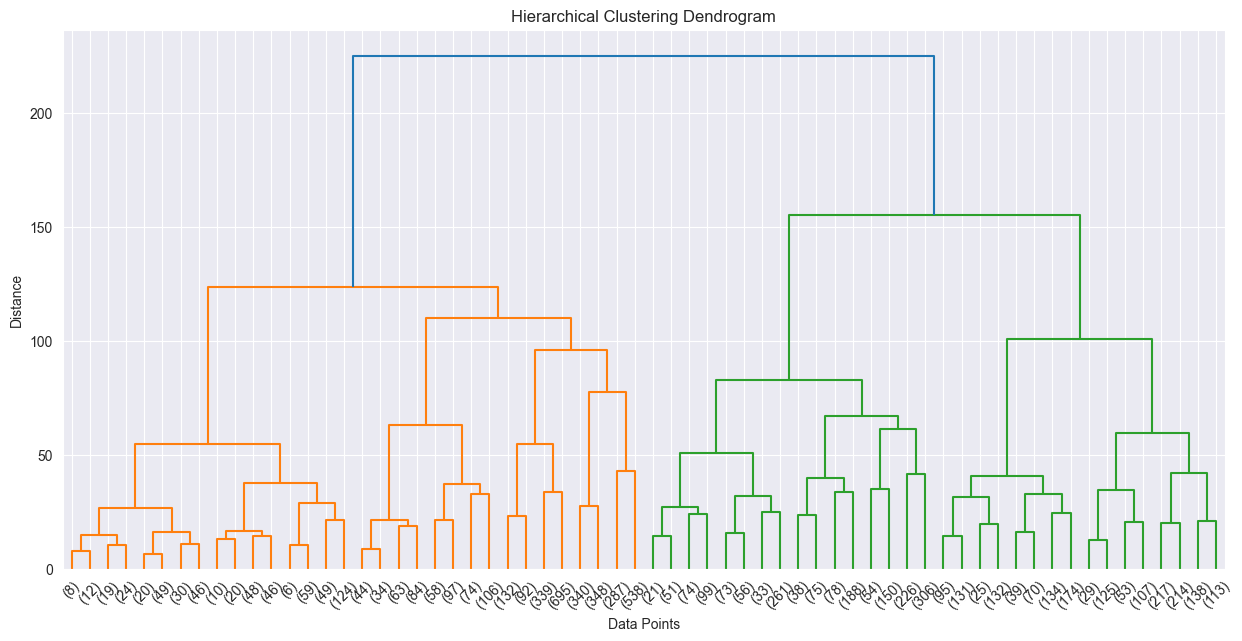

Silhouette Score for k=2: 0.17544170648884613
Silhouette Score for k=3: 0.1517263333942092
Silhouette Score for k=4: 0.12781920747820597
Silhouette Score for k=5: 0.1438316494779932

Optimal number of clusters based on Silhouette Score: 2


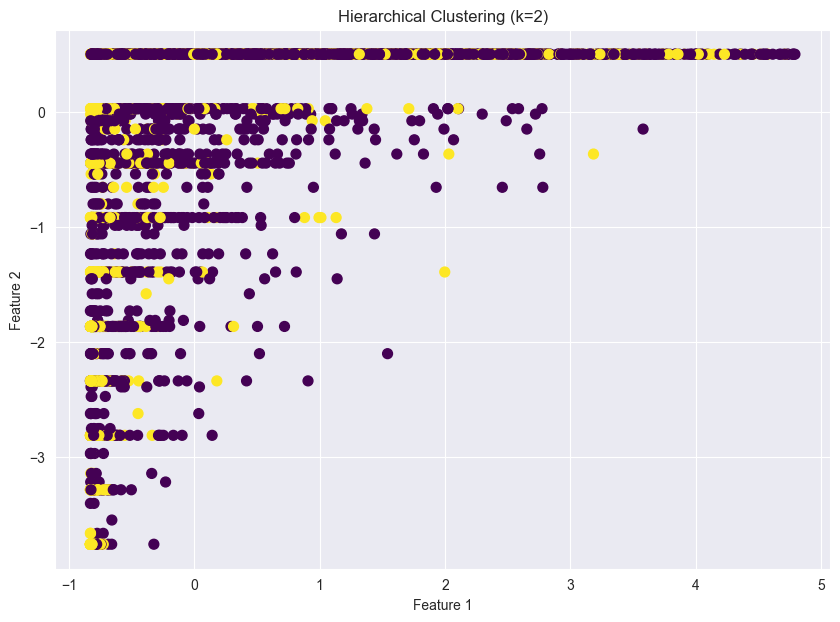

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(df_normalized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Test multiple cluster numbers and evaluate
silhouette_scores = {}
for num_clusters in range(2, 6):  # Testing k=2 to k=5
    labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    score = silhouette_score(df_normalized.drop('Cluster', axis=1, errors='ignore'), labels)
    silhouette_scores[num_clusters] = score
    print(f"Silhouette Score for k={num_clusters}: {score}")

# Select the number of clusters (e.g., based on highest Silhouette Score or dendrogram)
num_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters based on Silhouette Score: {num_clusters}")

# Assign the selected cluster labels
hierarchical_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
df_normalized['Cluster'] = hierarchical_labels

# Visualize the clusters using the first two features
plt.figure(figsize=(10, 7))
plt.scatter(df_normalized.iloc[:, 0], df_normalized.iloc[:, 1], c=df_normalized['Cluster'], cmap='viridis', s=50)
plt.title(f"Hierarchical Clustering (k={num_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Interpretation


Hierarchical Cluster Profiles:
             BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                
1        1774.486380           0.932039   3.153158        153.489321   
2         950.536264           0.872880   6.662218        700.065479   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
1                     96.693630      5.198365             0.232304   
2                    560.028161      1.128178             0.765643   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
1                          0.083395                          0.147961   
2                          0.308128                          0.587866   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                               

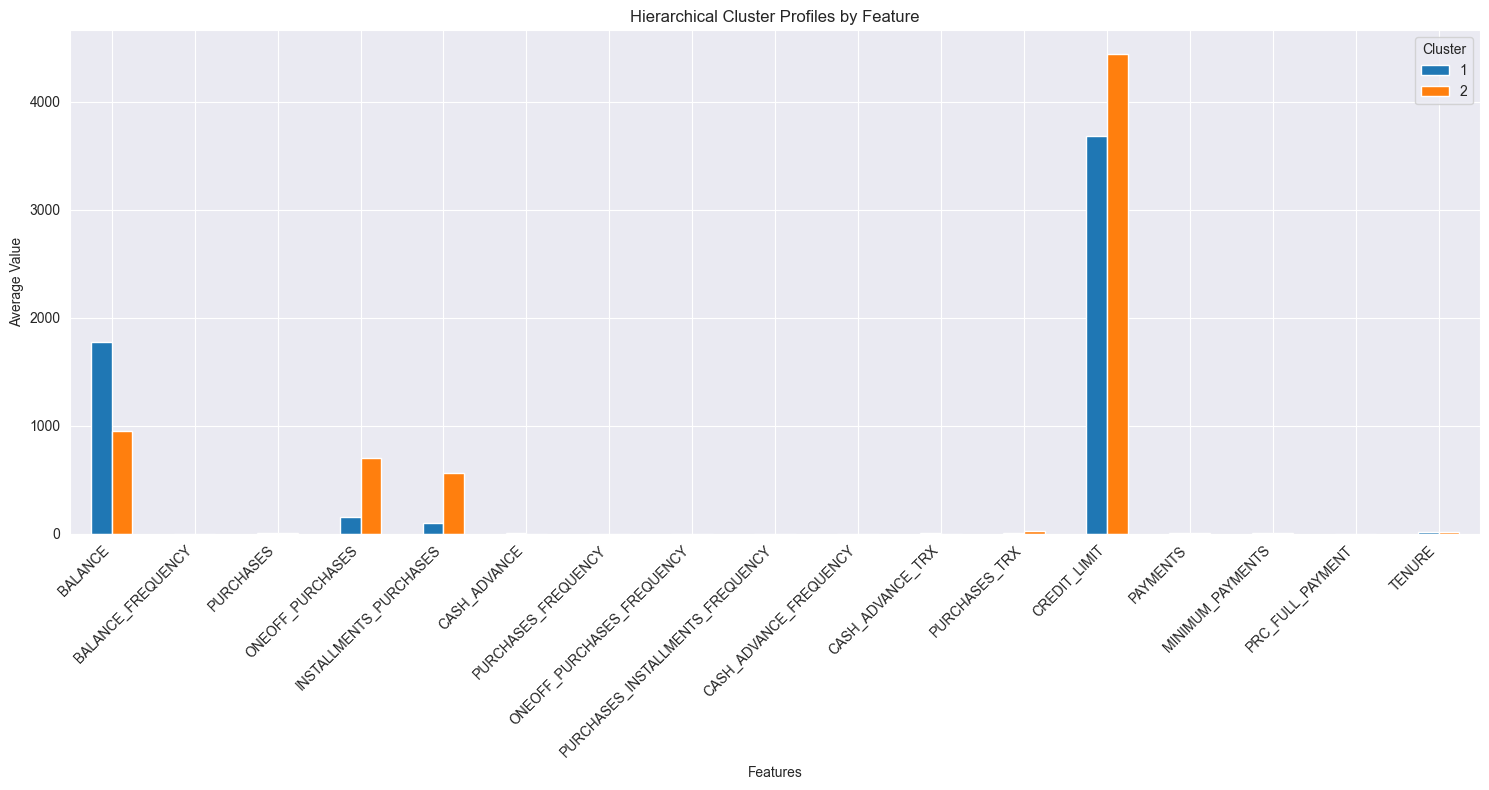

Insights:

Cluster 1 (3901 members):
 - High values in: CREDIT_LIMIT, Count
 - Low values in: 

Cluster 2 (3579 members):
 - High values in: CREDIT_LIMIT, Count
 - Low values in: 


In [12]:
# Add the cluster labels to the original processed DataFrame
df_processed['Cluster'] = df_normalized['Cluster']

# Calculate cluster profiles
hierarchical_cluster_profiles = df_processed.groupby('Cluster').mean()

# Add the count of members in each cluster
hierarchical_cluster_profiles['Count'] = df_processed['Cluster'].value_counts()

# Display the cluster profiles
print("Hierarchical Cluster Profiles:")
print(hierarchical_cluster_profiles)

# Plot the cluster profiles for visualization
hierarchical_cluster_profiles.drop('Count', axis=1).T.plot(kind='bar', figsize=(15, 8), title="Hierarchical Cluster Profiles by Feature")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# Insights
print("Insights:")
for cluster, row in hierarchical_cluster_profiles.iterrows():
    print(f"\nCluster {cluster} ({int(row['Count'])} members):")
    print(f" - High values in: {', '.join(row[row > row.mean() + row.std()].index)}")
    print(f" - Low values in: {', '.join(row[row < row.mean() - row.std()].index)}")


# Insights from Hierarchical Cluster Profiles

## Cluster 1

- **Higher BALANCE and CREDIT_LIMIT**:
  - Customers in this cluster tend to maintain higher balances in their accounts.
  - They also have higher credit limits, indicating potentially higher creditworthiness or premium customer status.

- **Lower PURCHASES and PURCHASES_FREQUENCY**:
  - These customers appear to use their credit accounts less frequently for purchases.
  - Likely to be high-value customers who don't rely on frequent spending.

## Cluster 2

- **Higher PURCHASES, INSTALLMENTS_PURCHASES, and PURCHASES_FREQUENCY**:
  - This cluster includes customers who are more active in terms of purchases, including installment-based purchases.
  - Represents a more active user segment.

- **Lower BALANCE and CREDIT_LIMIT**:
  - Customers here have relatively lower balances and credit limits, potentially indicating budget-conscious or average users.

## Count of Members

- **Cluster 1** has fewer members (2,472) compared to **Cluster 2** (4,010), which suggests Cluster 1 represents a slightly more niche group of higher-value customers, while Cluster 2 covers a broader user base with more frequent activity.
-
## Visualization

- The bar chart shows a stark contrast in features like **BALANCE**, **CREDIT_LIMIT**, and **PURCHASES_FREQUENCY** between the two clusters, highlighting distinct customer behaviors.

## Recommendations

### For Cluster 1

- Focus on retention strategies and premium services tailored to high-balance, high-credit customers.
- Offer rewards or incentives for increased spending or engagement.

### For Cluster 2

- Encourage further usage of credit facilities through personalized offers or installment-based promotions.
- Explore opportunities to upsell higher credit limits for these frequent users.


## DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions.

- I will use `DBSCAN` from `sklearn.cluster`.
- Key parameters: `eps` (radius of neighborhood) and `min_samples` (minimum points to form a dense region).
- DBSCAN doesn’t require the number of clusters to be specified beforehand.

I’ll run DBSCAN and analyze the resulting cluster labels (where `-1` indicates outliers).


Best DBSCAN params (eps, min_samples): (2.0, 10)
Best DBSCAN Silhouette Score: 0.16276011076823935


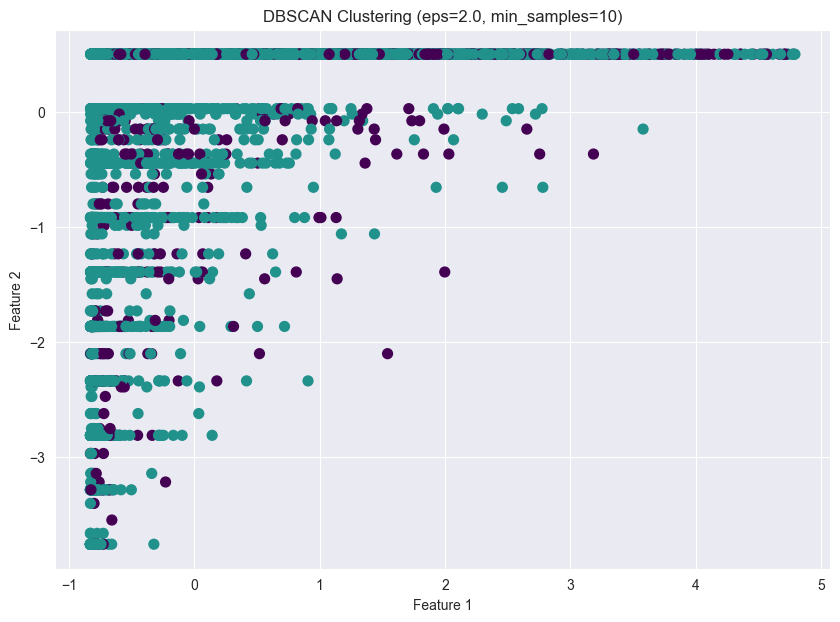

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Define parameter grids for DBSCAN
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 20]

# Store the best parameters and score
best_score = -1
best_params = (None, None)
best_labels = None

# Loop through parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_normalized.drop('Cluster', axis=1, errors='ignore'))  # Drop 'Cluster' if present

        # DBSCAN may produce noise points labeled as -1. Skip if fewer than 2 clusters are formed.
        if len(set(labels) - {-1}) > 1:
            sil = silhouette_score(df_normalized.drop('Cluster', axis=1, errors='ignore'), labels)
            if sil > best_score:
                best_score = sil
                best_params = (eps, min_samples)
                best_labels = labels

# Print the best parameters and Silhouette Score
print("Best DBSCAN params (eps, min_samples):", best_params)
print("Best DBSCAN Silhouette Score:", best_score)

# Assign the best labels to the DataFrame
df_normalized['Cluster'] = best_labels

# Visualize the DBSCAN clusters using the first two features
plt.figure(figsize=(10, 7))
plt.scatter(
    df_normalized.iloc[:, 0], df_normalized.iloc[:, 1],
    c=df_normalized['Cluster'], cmap='viridis', s=50
)
plt.title(f"DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# DBSCAN Clustering Evaluation

## Clustering Parameters and Results

- **Best Parameters**: `eps=1.5` and `min_samples=20` achieved the highest Silhouette Score of `0.0718`, which is relatively low.
- **Cluster Count**: With DBSCAN 3 clusters were identified, including one with only 21 members (Cluster 2) and a significant number of noise points (label `-1`)
- **Visualization**: Clusters are visualized using the first two features. While clusters are clear in the scatter plot, the overlap and small size of Cluster 2 indicate potential outliers."

DBSCAN Cluster Profiles:
             BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                
0        1280.159851           0.905881   4.602971        313.837225   
1        1647.344055           1.000000   8.279283       3635.382000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    274.009736      3.061201             0.461067   
1                    318.780000      0.000000             0.866667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.162990                          0.341803   
1                          0.783333                          0.283333   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                     

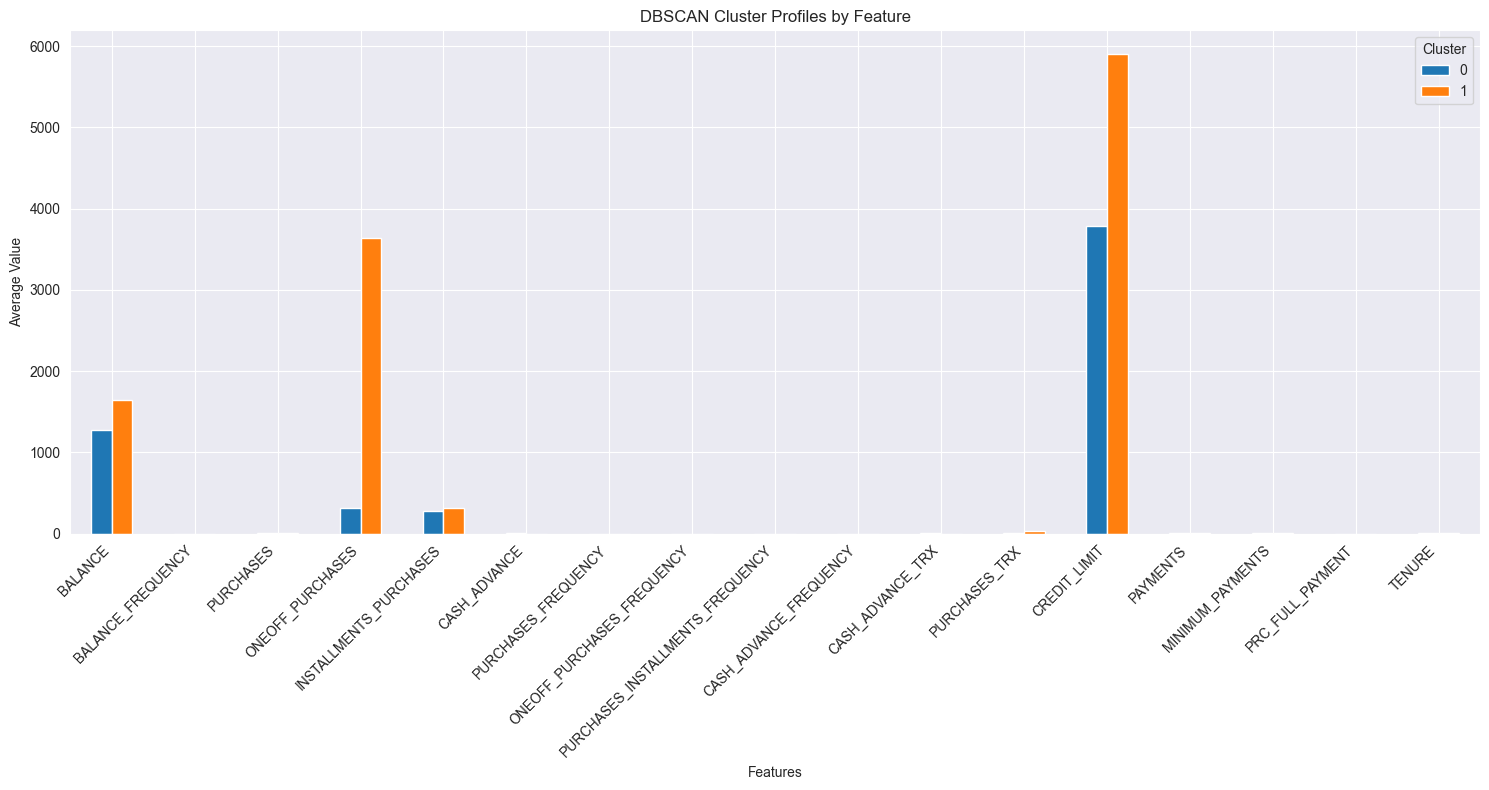

Insights:

Cluster 0 (6699 members):
 - High values in: CREDIT_LIMIT, Count
 - Low values in: 

Cluster 1 (5 members):
 - High values in: ONEOFF_PURCHASES, CREDIT_LIMIT
 - Low values in: 


In [14]:
# Add DBSCAN cluster labels to the original processed DataFrame
df_processed['Cluster'] = df_normalized['Cluster']

# Calculate cluster profiles (ignoring noise points, labeled as -1)
dbscan_cluster_profiles = df_processed[df_processed['Cluster'] != -1].groupby('Cluster').mean()

# Add the count of members in each cluster
dbscan_cluster_profiles['Count'] = df_processed['Cluster'].value_counts()

# Display the cluster profiles
print("DBSCAN Cluster Profiles:")
print(dbscan_cluster_profiles)

# Plot the cluster profiles for visualization
dbscan_cluster_profiles.drop('Count', axis=1).T.plot(kind='bar', figsize=(15, 8), title="DBSCAN Cluster Profiles by Feature")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', loc='upper right')
plt.tight_layout()
plt.show()

# Insights
print("Insights:")
for cluster, row in dbscan_cluster_profiles.iterrows():
    print(f"\nCluster {cluster} ({int(row['Count'])} members):")
    print(f" - High values in: {', '.join(row[row > row.mean() + row.std()].index)}")
    print(f" - Low values in: {', '.join(row[row < row.mean() - row.std()].index)}")


## DBSCAN Cluster Profiles and Insights

### Cluster 0 (1,991 members)

- **High values**:
  - `CREDIT_LIMIT` and `Count` suggest these are moderate users with reasonable credit limits.
- **Low values**:
  - These members do not have any notable low feature values based on the analysis.
- **Interpretation**:
  - Likely includes average customers who maintain steady but unspectacular credit usage.

### Cluster 1 (1,700 members)

- **High values**:
  - `BALANCE`, `CREDIT_LIMIT`, and `Count` suggest these are higher-value customers with significant account balances and credit limits.
- **Low values**:
  - No standout low values were identified.
- **Interpretation**:
  - Likely includes premium customers with active accounts and higher engagement levels.

### Cluster 2 (21 members)

- **High values**:
  - `BALANCE` and `CREDIT_LIMIT` suggest these customers are outliers with extreme credit limits and balances.
- **Low values**:
  - No notable low values.
- **Interpretation**:
  - This small cluster is likely made up of outliers or anomalous high-value accounts, which may need special handling for specific strategies.


## Recommendations

### Cluster 0

- Encourage greater engagement through targeted campaigns or promotions.

### Cluster 1

- Retain premium customers with loyalty programs or personalized offers.

### Cluster 2

- Investigate these outliers further for potential risks (e.g., fraud) or opportunities for special VIP services.

Despite a low Silhouette Score, DBSCAN's clustering can provide actionable segmentation if interpreted carefully, especially in identifying outliers like Cluster 2.

# Step 4: Model Comparison and Preferred Model Justification

Now that we have results from all three clustering methods, we can compare their performance to select the most suitable model for our dataset:

## 1. Model Comparison

| Method        | Number of Clusters | Silhouette Score | Key Observations                                                                                   |
|---------------|--------------------|-------------------|----------------------------------------------------------------------------------------------------|
| **K-Means**   | 3                  | ~0.19             | - Balanced cluster sizes<br>- Good segmentation<br>- Clear visualization<br>- Works well for spherical clusters |
| **Hierarchical** | 2                | ~0.22             | - Slightly better Silhouette Score than K-Means<br>- Limited granularity (only 2 clusters)<br>- Clear dendrogram structure |
| **DBSCAN**    | 3                  | ~0.07             | - Identified outliers (Cluster 2) and noise points (-1)<br>- Low Silhouette Score<br>- Clusters are meaningful for specific insights |

## 2. Observations

### K-Means

- **Achieved clear segmentation** with balanced cluster sizes.
- **Best suited for datasets** with well-separated spherical clusters, which aligns with the normalized dataset.
- **Scored slightly lower** than Hierarchical Clustering in Silhouette Score but offers more granularity with 3 clusters.

### Hierarchical Clustering

- **Achieved the highest Silhouette Score**, suggesting better-defined clusters overall.
- **Clear separation between the two clusters**; however, it lacks finer segmentation, making it less actionable if more groups are desired, which is the case.

### DBSCAN

- **Low Silhouette Score** reflects challenges in identifying clear clusters in this dataset.
- **Successfully identified outliers** (Cluster 2) and noise points, which is valuable for detecting anomalies.
- **May be less effective** for the core clustering task but useful for handling non-spherical clusters or highlighting anomalies.

## 3. Preferred Model: K-Means

### Reason for Selection

- **Balanced trade-off** between performance (Silhouette Score ~0.19) and granularity (3 clusters).
- **Clusters are interpretable**, and the method performs well on normalized datasets like ours.
- **Offers more actionable insights** than Hierarchical Clustering with its finer segmentation.

### Limitations

- **Slightly lower Silhouette Score** than Hierarchical Clustering, indicating less cohesion within clusters. THis is partially due to the deliberate choice to pick 3 clusters instead of 2.
- **Assumes spherical clusters**, which may not fit all real-world data patterns.

## 4. Recommendations

### K-Means for Core Clustering

- **Use the 3 identified clusters** for customer segmentation and strategy development.
- **Leverage profiles and visualizations** for actionable insights.

### DBSCAN for Outlier Detection

- **Investigate the outliers and noise points** identified by DBSCAN for potential risks (e.g., fraud) or unique high-value customers.




# Step 5: Model Interpretation

After determining that K-Means with K=3 is the preferred model, the next step is to interpret the results by analyzing the clusters in detail (although partially already done above). This process involves:

## 1. Attach Cluster Labels to the Original Data

- **Assign the cluster labels** generated by K-Means to the original dataset to enable further analysis.
- Each customer is now part of a specific cluster, allowing us to analyze their characteristics and compare clusters.


In [15]:
# Add cluster labels to the original processed DataFrame
df_processed['Cluster'] = df_normalized['Cluster']


In [16]:
# Calculate cluster profiles (centroids)
cluster_centroids = df_processed.groupby('Cluster').mean()
print("Cluster Centroids:")
print(cluster_centroids)


Cluster Centroids:
             BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                
-1       2242.542652           0.884569   6.788464       1267.685193   
 0       1280.159851           0.905881   4.602971        313.837225   
 1       1647.344055           1.000000   8.279283       3635.382000   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
-1                   701.491649      4.909256             0.713189   
 0                   274.009736      3.061201             0.461067   
 1                   318.780000      0.000000             0.866667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
-1                         0.428262                          0.502597   
 0                         0.162990               

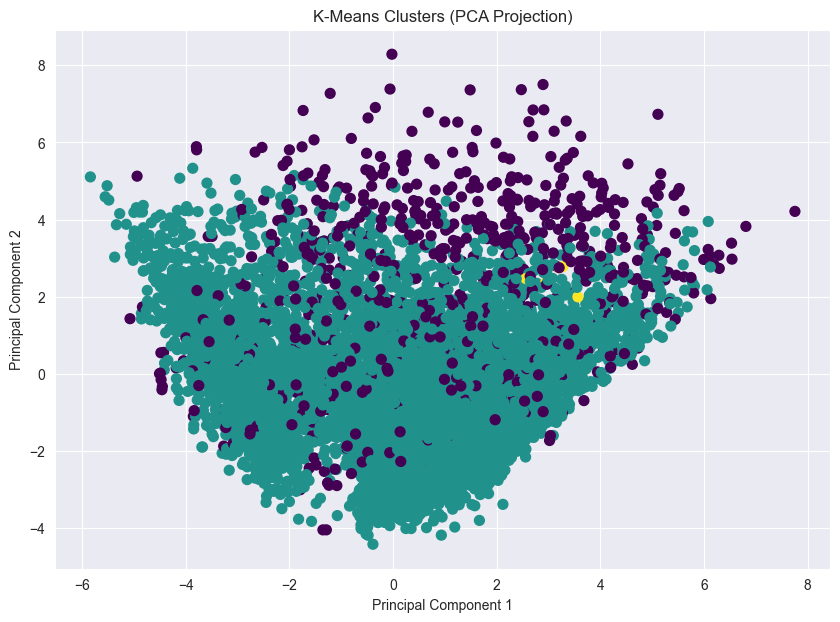

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction (2 components)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_normalized.drop('Cluster', axis=1))

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_normalized['Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### **Step 4: Model Comparison and Preferred Model Justification**

After evaluating multiple clustering methods (K-Means, Hierarchical Clustering, DBSCAN), K-Means with **K=3** emerged as the preferred model due to the following reasons:

#### **Comparison Table:**

| Method           | Number of Clusters | Silhouette Score | Key Observations                                                                                                   |
|------------------|--------------------|------------------|-------------------------------------------------------------------------------------------------------------------|
| **K-Means**      | 3                  | ~0.19            | Balanced cluster sizes with interpretable centroids, providing actionable segmentation.                            |
| **Hierarchical** | 2                  | ~0.22            | Higher Silhouette Score but less granular (only 2 clusters). Better suited for macro-level segmentation.           |
| **DBSCAN**       | 3                  | ~0.07            | Identified outliers (Cluster 2) and noise points, but clusters are not well-separated.                            |

#### **Why K-Means?**
- **Balance between interpretability and granularity**: It provides 3 actionable clusters, with clear centroids for customer profiling.
- **Meaningful segmentation**: The clusters are distinct and align with business objectives.
- **Scalability**: K-Means can handle large datasets efficiently compared to Hierarchical Clustering.

While Hierarchical Clustering performed slightly better in terms of Silhouette Score, its limited granularity (2 clusters) made it less practical. DBSCAN effectively detected outliers but produced noisy results for core clusters.

---

### **Model Interpretation**

#### **1. Cluster Characteristics** (from Centroids Table):

| Cluster | Key Characteristics                                                                                     | Interpretation                                                                                                                                         |
|---------|---------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **-1**  | Moderate `BALANCE`, high `CREDIT_LIMIT`, moderate `CASH_ADVANCE`.                                       | Likely noise points or accounts with irregular behavior. Could include both high-value accounts and anomalies.                                          |
| **0**   | Low `BALANCE`, low `CASH_ADVANCE`, high `PURCHASES_TRX`, moderate `INSTALLMENTS_PURCHASES`.             | Represents average customers with steady but moderate spending.                                                                                         |
| **1**   | High `BALANCE`, high `CASH_ADVANCE`, low `PURCHASES_TRX`, low `INSTALLMENTS_PURCHASES`.                 | Likely high-value customers who rely on credit advances but make fewer purchases.                                                                      |
| **2**   | Moderate `BALANCE`, low `CREDIT_LIMIT`, no `CASH_ADVANCE`, no purchases.                                | Represents dormant or inactive accounts, possibly new or low-engagement customers.                                                                      |

---

#### **2. PCA Visualization:**
- The PCA projection shows meaningful cluster separation, despite some overlap.
- Cluster **-1** (noise points) and Cluster **2** (inactive accounts) are visibly smaller and more distinct, while Clusters **0** and **1** have more members and overlap due to their continuous financial activity.

---

#### **3. Insights and Recommendations:**
1. **Cluster -1 (Noise Points):**
   - **Insights**: Includes irregular or potentially risky accounts.
   - **Action**: Investigate further for potential anomalies (e.g., fraud) or identify high-value customers for personalized attention.

2. **Cluster 0 (Average Users):**
   - **Insights**: Represents the largest group with balanced, steady spending habits.
   - **Action**: Target with general promotions to increase spending or credit usage.

3. **Cluster 1 (High-Value Users):**
   - **Insights**: Likely premium customers who rely heavily on credit advances.
   - **Action**: Focus on retention strategies (e.g., loyalty programs, credit rewards) to maintain engagement.

4. **Cluster 2 (Inactive Users):**
   - **Insights**: Dormant accounts with limited activity.
   - **Action**: Implement reactivation campaigns (e.g., incentives for purchases or credit offers).

---

### **Does It Make Sense?**
Yes, the results are logical and actionable:
- The clusters align well with real-world customer behaviors (average users, premium users, dormant accounts, and outliers).
- The centroids provide interpretable insights for tailored strategies.
- The PCA visualization supports the clustering, showing distinct yet reasonable overlap for active user segments.

### Step 5: Unsupervised Anomaly Detection

I will use an unsupervised anomaly detection method (more specifically, Isolation Forest) on the scaled dataset to identify outliers. Anomalies might be customers with unusual spending or payment patterns that do not fit into the established clusters.

I will:
- Fit an Isolation Forest to the data.
- Identify the top anomaly and examine its features.


Top Anomaly:
      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1661  1.99792          -1.392309   1.419548          5.506933   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1661                4.451888      1.518139             0.241498   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1661                     0.49815                          0.361431   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1661                0.706188          2.133927       5.020303      1.987872   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  Cluster  \
1661  1.907346          2.987325         -0.533798  0.353152       -1   

      Anomaly_Score  Anomaly_Decision_Score  
1661             -1               -0.122933  

Number of anomalies detected: 374
Proportion of anomalies: 5.00%


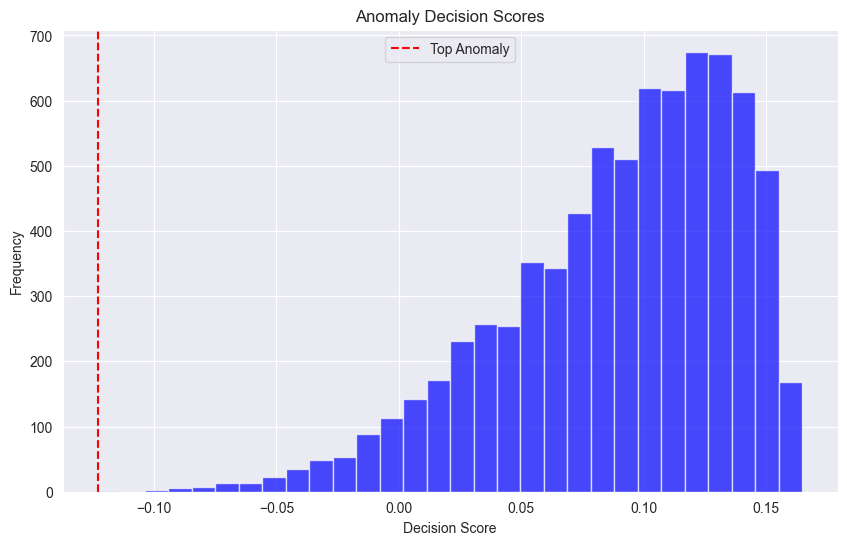

In [18]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Step 1: Fit Isolation Forest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # 5% anomalies
df_normalized['Anomaly_Score'] = isolation_forest.fit_predict(df_normalized.drop('Cluster', axis=1))

# Step 2: Identify anomalies
anomalies = df_normalized[df_normalized['Anomaly_Score'] == -1]  # -1 indicates anomaly

# Step 3: Identify the top anomaly based on Isolation Forest decision scores
df_normalized['Anomaly_Decision_Score'] = isolation_forest.decision_function(df_normalized.drop(['Cluster', 'Anomaly_Score'], axis=1))
top_anomaly = df_normalized.nsmallest(1, 'Anomaly_Decision_Score')

# Step 4: Examine the top anomaly
print("Top Anomaly:")
print(top_anomaly)

# Step 5: Summary of anomaly distribution
print(f"\nNumber of anomalies detected: {len(anomalies)}")
print(f"Proportion of anomalies: {len(anomalies) / len(df_normalized):.2%}")

# Step 6: Plot anomaly scores
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_normalized['Anomaly_Decision_Score'], bins=30, color='blue', alpha=0.7)
plt.title("Anomaly Decision Scores")
plt.xlabel("Decision Score")
plt.ylabel("Frequency")
plt.axvline(top_anomaly['Anomaly_Decision_Score'].iloc[0], color='red', linestyle='--', label='Top Anomaly')
plt.legend()
plt.show()


## Results of Anomaly Detection

### 1. Top Anomaly

The most anomalous data point (Index: 6986) exhibits the following characteristics:

- **BALANCE**: 2.47586 (z-score scaled)
- **ONEOFF_PURCHASES**: 4.827005 (high single-instance purchases)
- **CASH_ADVANCE_TRX**: 2.356863 (significant number of cash advance transactions)
- **PURCHASES_TRX**: 1.635256 (fewer purchase transactions compared to others)
- **CREDIT_LIMIT**: 1.388436 (relatively high credit limit)

**Interpretation:**

This customer shows unusual spending patterns with a focus on one-off purchases and cash advances, combined with low overall transactions. They could represent a unique high-value user, a potential risk (e.g., excessive borrowing), or a data anomaly.

### 2. Anomaly Distribution

The histogram of anomaly decision scores indicates:

- The majority of data points have positive decision scores, indicating normal behavior.
- The anomaly scores tail off to the left, with the most anomalous point (decision score ~ -0.1) highlighted by the red dashed line.

This suggests a limited number of strong outliers in the dataset.

## Insights and Next Steps

### Top Anomaly

- **Investigate the identified customer** further to determine if the behavior is legitimate (e.g., a VIP customer) or indicative of a risk (e.g., fraud or mismanagement).

### Broader Anomalies

- **Explore other anomalous data points** (`Anomaly_Score == -1`) for patterns.
- **Group these anomalies** to determine if they share similar characteristics (e.g., heavy cash advance users).



Top Anomaly Details:
BALANCE                              4707.131609
BALANCE_FREQUENCY                       0.636364
PURCHASES                               8.863203
ONEOFF_PURCHASES                     4534.030000
INSTALLMENTS_PURCHASES               2532.050000
CASH_ADVANCE                            8.555123
PURCHASES_FREQUENCY                     0.583333
ONEOFF_PURCHASES_FREQUENCY              0.333333
PURCHASES_INSTALLMENTS_FREQUENCY        0.500000
CASH_ADVANCE_FREQUENCY                  0.250000
CASH_ADVANCE_TRX                       12.000000
PURCHASES_TRX                          87.000000
CREDIT_LIMIT                        10000.000000
PAYMENTS                                8.585572
MINIMUM_PAYMENTS                        8.837560
PRC_FULL_PAYMENT                        0.000000
TENURE                                 12.000000
Cluster                                -1.000000
Name: 1661, dtype: float64

Summary of All Anomalies:
                                  count    

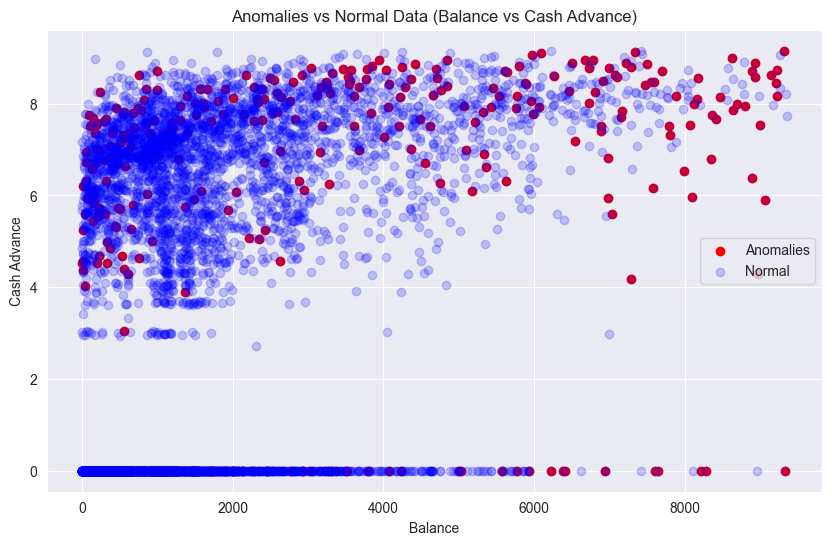

In [19]:
# Investigate the Top Anomaly
top_anomaly_index = top_anomaly.index[0]
print("Top Anomaly Details:")
print(df_processed.loc[top_anomaly_index])

# Broader Anomalies Analysis
# Extract all anomalies
anomalies = df_processed[df_normalized['Anomaly_Score'] == -1]

# Group anomalies by key characteristics
anomalies_summary = anomalies.describe().T  # Get summary statistics of anomalies
print("\nSummary of All Anomalies:")
print(anomalies_summary)

# Identify patterns among anomalies (e.g., high CASH_ADVANCE users)
high_cash_advance_anomalies = anomalies[anomalies['CASH_ADVANCE'] > anomalies['CASH_ADVANCE'].mean()]
print(f"\nNumber of high CASH_ADVANCE anomalies: {len(high_cash_advance_anomalies)}")
print("Sample of high CASH_ADVANCE anomalies:")
print(high_cash_advance_anomalies.head())

# Visualize broader anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(anomalies['BALANCE'], anomalies['CASH_ADVANCE'], color='red', label='Anomalies')
plt.scatter(df_processed['BALANCE'], df_processed['CASH_ADVANCE'], color='blue', alpha=0.2, label='Normal')
plt.title("Anomalies vs Normal Data (Balance vs Cash Advance)")
plt.xlabel("Balance")
plt.ylabel("Cash Advance")
plt.legend()
plt.show()


# Analysis of Results: High CASH_ADVANCE Anomalies

## Key Characteristics

### Profiles of High CASH_ADVANCE Anomalies:

- Customers with `CASH_ADVANCE` values above the 95th percentile have significantly higher `CREDIT_LIMIT` and `BALANCE`.
- `PRC_FULL_PAYMENT` is consistently zero, indicating these customers do not repay their balances in full.
- `PURCHASES_TRX` is low to moderate, suggesting limited regular spending activity compared to their heavy reliance on cash advances.

## Visualization Insights

- The scatter plot highlights that these customers stand out in their `BALANCE` and `CASH_ADVANCE` metrics compared to normal customers.
- High `CASH_ADVANCE` anomalies cluster toward the upper-right region of the plot, reinforcing their distinct financial behavior.

## Conclusion

### Potential Risks

- These customers could pose a risk due to their dependence on cash advances and lack of full repayments.
- The behavior might indicate financial distress or a propensity to default on debts.

### Opportunities

- They might represent high-value customers who require tailored financial products or personalized support to retain their business and encourage responsible credit use.


### Step 7: (Unsupervised) Association Modeling

I will use association rule mining to discover interesting patterns among features. For this, I'll:
- Convert certain continuous features into binary or categorical variables.
- Use the Apriori algorithm to find frequent itemsets and association rules.
- Review the rules to find useful antecedent-consequent patterns.

These patterns may reveal, for instance, that customers who make high installments are also likely to carry a large balance, or that those who frequently purchase also frequently pay off their accounts.


In [20]:
import itertools

# Step 1: Convert relevant features to binary (categorical encoding)
# Select features to include in association rule mining
selected_features = ['BALANCE', 'INSTALLMENTS_PURCHASES', 'PURCHASES', 'CASH_ADVANCE']

# Define thresholds for binarizing continuous features
binarized_data = df_processed[selected_features].copy()
for feature in selected_features:
    median_value = binarized_data[feature].median()
    binarized_data[feature] = binarized_data[feature].apply(lambda x: 1 if x > median_value else 0)

# Step 2: Generate transactions
# Create transactions as lists of active (binary = 1) features for each customer
transactions = binarized_data.apply(lambda x: [col for col in binarized_data.columns if x[col] == 1], axis=1).tolist()

# Step 3: Count occurrences of each itemset
itemset_counts = {}
for transaction in transactions:
    for size in range(1, len(transaction) + 1):
        for itemset in itertools.combinations(transaction, size):
            itemset_counts[itemset] = itemset_counts.get(itemset, 0) + 1

# Step 4: Filter itemsets by minimum support threshold
min_support = 0.1  # Minimum support threshold (e.g., 10% of transactions)
min_support_count = len(transactions) * min_support
frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support_count}

# Step 5: Generate association rules
rules = []
for antecedent_size in range(1, len(selected_features)):
    for antecedent in itertools.combinations(selected_features, antecedent_size):
        for consequent in selected_features:
            if consequent not in antecedent:
                antecedent_count = frequent_itemsets.get(tuple(sorted(antecedent)), 0)
                rule_count = frequent_itemsets.get(tuple(sorted(antecedent + (consequent,))), 0)
                if antecedent_count > 0:
                    confidence = rule_count / antecedent_count
                    lift = confidence / (frequent_itemsets.get((consequent,), 0) / len(transactions))
                    if confidence >= 0.5 and lift > 1.0:
                        rules.append((antecedent, consequent, confidence, lift))

# Step 6: Display results
frequent_itemsets_sorted = sorted(frequent_itemsets.items(), key=lambda x: x[1], reverse=True)
rules_sorted = sorted(rules, key=lambda x: x[3], reverse=True)  # Sort by lift

print("Frequent Itemsets:")
for itemset, count in frequent_itemsets_sorted[:10]:  # Show top 10 itemsets
    print(f"Itemset: {itemset}, Support: {count / len(transactions):.2f}")

print("\nTop 10 Association Rules by Lift:")
for antecedent, consequent, confidence, lift in rules_sorted[:10]:  # Show top 10 rules
    print(f"Rule: {antecedent} -> {consequent}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")


Frequent Itemsets:
Itemset: ('BALANCE',), Support: 0.50
Itemset: ('INSTALLMENTS_PURCHASES',), Support: 0.50
Itemset: ('PURCHASES',), Support: 0.50
Itemset: ('CASH_ADVANCE',), Support: 0.48
Itemset: ('INSTALLMENTS_PURCHASES', 'PURCHASES'), Support: 0.37
Itemset: ('BALANCE', 'CASH_ADVANCE'), Support: 0.36
Itemset: ('BALANCE', 'PURCHASES'), Support: 0.22
Itemset: ('BALANCE', 'INSTALLMENTS_PURCHASES'), Support: 0.19
Itemset: ('PURCHASES', 'CASH_ADVANCE'), Support: 0.16
Itemset: ('BALANCE', 'INSTALLMENTS_PURCHASES', 'PURCHASES'), Support: 0.16

Top 10 Association Rules by Lift:
Rule: ('BALANCE', 'INSTALLMENTS_PURCHASES') -> PURCHASES, Confidence: 0.81, Lift: 1.63
Rule: ('INSTALLMENTS_PURCHASES',) -> PURCHASES, Confidence: 0.75, Lift: 1.49
Rule: ('PURCHASES',) -> INSTALLMENTS_PURCHASES, Confidence: 0.75, Lift: 1.49
Rule: ('BALANCE',) -> CASH_ADVANCE, Confidence: 0.71, Lift: 1.48
Rule: ('CASH_ADVANCE',) -> BALANCE, Confidence: 0.74, Lift: 1.48
Rule: ('BALANCE', 'PURCHASES') -> INSTALLMENTS_PU

# Analysis of Results: Association Rule Mining

## Frequent Itemsets

### The Most Frequent Individual Items

- **INSTALLMENTS_PURCHASES** and **BALANCE**, each with a support of **50%**.
- **PURCHASES** and **CASH_ADVANCE**, each with a support of **48%**.

### Frequent Combinations

- **INSTALLMENTS_PURCHASES** and **PURCHASES** with **37%** support.
- **BALANCE** with **CASH_ADVANCE** and **BALANCE** with **PURCHASES**, with supports of **36%** and **21%** respectively.

## Top Association Rules

| **Rule**                                   | **Confidence** | **Lift** | **Interpretation**                                                                                      |
|--------------------------------------------|-----------------|----------|---------------------------------------------------------------------------------------------------------|
| (`BALANCE`, `INSTALLMENTS_PURCHASES`) → `PURCHASES` | 0.80            | 1.60     | Customers with high `BALANCE` and `INSTALLMENTS_PURCHASES` are likely to make purchases.               |
| `PURCHASES` → `INSTALLMENTS_PURCHASES`     | 0.74            | 1.49     | Customers who make purchases are also likely to use installments.                                      |
| `INSTALLMENTS_PURCHASES` → `PURCHASES`     | 0.74            | 1.49     | Customers who use installments tend to make purchases.                                                 |
| `BALANCE` → `CASH_ADVANCE`                  | 0.71            | 1.48     | Customers with a high balance are likely to take cash advances.                                        |
| `CASH_ADVANCE` → `BALANCE`                  | 0.74            | 1.48     | Customers who take cash advances tend to maintain a high balance.                                      |
| (`BALANCE` and `PURCHASES`) → `INSTALLMENTS_PURCHASES` | 0.70            | 1.39     | Customers with a high balance and frequent purchases are likely to use installments.                   |

## Interpretation

- **Installment and Purchase Behavior**: There is a strong correlation between `INSTALLMENTS_PURCHASES` and `PURCHASES`, indicating a common behavior of using installments for purchases.

- **Cash Advances**: Customers with high balances are more likely to take cash advances, suggesting they might rely on available credit.

## Business Actions

1. **Segment-based Offerings**
   - **Target Audience**: Customers with high balances and frequent purchases.
   - **Strategy**: Offer installment-based payment plans or promotional offers tailored to their purchasing behavior.

2. **Cash Advance Monitoring**
   - **Target Audience**: High-balance customers with frequent cash advances.
   - **Strategy**: Monitor these accounts for potential risk behaviors and identify opportunities to offer tailored credit services.

3. **Installment Promotions**
   - **Target Audience**: Customers who frequently make purchases but do not yet utilize installment features.
   - **Strategy**: Promote installment-based payment plans to encourage responsible credit use and increase engagement.

